# Final Project - Predicting Movie Genres!

![Movie genre header](genre_header.jpg)

Welcome to the final project of CS109b. 

The overall theme of the final project is movie data with a focus on movie genre prediction, because it is an area where we are all more or less application domain experts. First, you will explore your data and the challenges of the problem by exploratory data analysis. Use visualizations to find features that correlate with movie genres. These can be extracted from the movie posters, or meta data, or other data you gather, for example plot summaries or even movie transcripts. You will then compare traditional statistical or machine learning methods like generalized additive models, random forest, Bayesian prediction methods, boosting, and SVM, to deep learning models for movie genre prediction. 

For this project you will work in teams of 3-4 people and there are weekly milestones to guide you along the way. Even though the milestones are graded, they are mainly in place to make sure you stay in contact with your TF and make progress with the project. Throughout the project you also have room for creativity and to pursue your own ideas. While you need to hand in the milestones at the appropriate due date, there is nothing preventing you from working on a later milestone ahead of time. We suggest that you read through the whole project and all milestones in the beginning to be able to plan ahead. The project is pretty open-ended, so you can be creative and let your data science knowledge shine! 

For each milestone you will submit a notebook, in raw (`.ipynb`) and PDF formats, containing the deliverables of that week and the extra work you did so far. The notebooks need to contain your code, comments, explanations, thoughts, and visualizations. The final deliverables are a two-minute screencast, a report in paper style for a general data science audience, and all your data and code that you developed throughout the project. 

Below is a description of the data and the milestones with their due dates. All work is due by 11:59PM on the due date unless otherwise specified. We expect you to have the mandatory parts finished by the milestone due dates, and there will be no extensions. However, we strongly encourage you to plan ahead. For example, you need to think about the classification task early on to plan how you want to assemble your training data, and it is beneficial to start the deep learning work as early as possible. There is nothing hindering you to already train a model in the EDA phase to get a better feel for what challenges might lie ahead with the data. You should also see the milestone requirements as a basis for your own creativity, and we expect that most of you will go beyond the mandatory deliverables. For example, if you have a great idea about an interesting question that has to do with movie genre, but cannot be answered with the data from TMDb or IMDb, feel free to gather more data from somewhere else. 

We provide a data interface in Python, because it is convenient for IMDb, and we will use Python for the deep learning part. Specifically we will use Keras, a deep learning library that provides a high level interface to Google's Tensorflow framework for deep learning. However, if you feel that you prefer to do some of the work, e.g., visualizations or data cleanup, in R then feel free to use it. You can also use Spark to preprocess your data, especially if you collect large amounts of it from other sources. 

*Important:* Your grade for a milestone will depend on the required deliverables you submit at the due date for that milestone. But every milestone, especially the final project submission, can contain additional cool work you did that goes beyond the deliverables spelled out below. 


### Logistics 

Please adhere to the following guidelines for all submissions:
- one submission per team
- notebooks should be submitted as PDF and as raw (`.ipynb`) version
- all notebooks should be executed so they contain relevant visualizations, and other results
- try to make it as easy as possible for the TFs to get all relevant information about your work
- do not submit big data sets, please provide a readme file with a link instead
- the final report should also be submitted as pdf

### Movie Data:

The project is based on two different sources of movie data: [IMDb](http://www.imdb.com/) and [TMDb](https://www.themoviedb.org/). TMDb is great, because it provides the movie posters in addition to the metadata. This is crucial for the deep learning part, in which you will try to predict movie genres from posters. IMDb has more metadata available and will supplement the TMDb data you have. 

TMDb provides an easy to use [API](https://www.themoviedb.org/documentation/api) that allows you to download the data selectively. IMDb does not provide an API, but there is a Python interface available to access the metadata. We will use [IMDbPY](http://imdbpy.sourceforge.net/), which is already installed on the AMI and virtual box images for your convenience.

*Important*: Please remember to limit your data rate when obtaining the data. Play nicely and do not just spam servers as fast as you can. This will prevent your IP from getting banned. The easiest way to do this is to use the [sleep](http://stackoverflow.com/questions/510348/how-can-i-make-a-time-delay-in-python) function in Python.


### Milestone 1: Getting to know your data, due Wednesday, April 5, 2017

In the beginning you should get acquainted with the data sources and do some EDA. Sign up for the TMDb [API](https://www.themoviedb.org/documentation/api), and try to download the poster of your favorite movie from within your notebook. Compare the genre entries of IMDb and TMDb for this movie and see if they are the same. Think about and write down some questions that you would like to answer in the following weeks. Keep the storytelling aspect of your final report in mind and do some pen and paper sketches about the visualizations you would like to produce. Include photographs of those sketches in your notebook. 

Most of the time a data scientist spends on a project is spent on cleaning the data. We are lucky that the data we have is already pretty clean. The Python interface to the IMDb ftp files does a lot of the additional work of cleaning as well. However, you will notice that the genre list for each movie from both databases can have different lengths. This needs to be changed in order to train a model to predict the movie genre. It is up to you to think about possible ways to address this problem and to implement one of them. There is no absolute right answer here. It depends on your interests and which questions you have in mind for the project. 

Optionally, you could also scrape additional data sources, such as Wikipedia, to obtain plot summaries. That data may give you additional useful features for genre classification. 

To guide your decision process, provide at least one visualization of how often genres are mentioned together in pairs. Your visualization should clearly show if a horror romance is more likely to occur in the data than a drama romance.

The notebook to submit for this milestone needs to at least include:

- API code to access the genre and movie poster path of your favorite movie
- Genre for this movie listed by TMDb and IMDb
- A list of the 10 most popular movies of 2016 from TMDb and their genre obtained via the API
- Comments on what challenges you see for predicting movie genre based on the data you have, and how to address them 
- Code to generate the movie genre pairs and a suitable visualization of the result
- Additional visualization sketches and EDA with a focus on movie genres
- A list of questions you could answer with this and related data. Get creative here!

The EDA questions do not necessarily have to tie into the modeling part later on. Think freely about things that might be interesting, like which actors are very specific to a genre? Are action movies more prone to producing sequels than romances? However, as you keep the focus on movie genres, think also about correlations you might discover that can help build features from the metadata for prediction. Is the length of a movie title correlated with genre?


In [162]:
import time
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

## Installed by running this line in terminal: pip install IMDbPY
## Tutorial found here http://imdbpy.sourceforge.net/support.html
import imdb

### Downloaded this via this line: pip install tmdbsimple
## Tutorial found here https://pypi.python.org/pypi/tmdbsimple
import tmdbsimple as tmdb 

In [35]:
## Pass in our tmdb Key 
tmdb.API_KEY = '352e668a0df90032e0f1097459228131'

# Create the object that will be used to access the IMDb's database.
ia = imdb.IMDb() # by default access the web.

# Genre entries from IMDb

In [3]:
# Search for a movie (get a list of Movie objects).
s_result = ia.search_movie('300')
s_result

[<Movie id:0416449[http] title:_300 (2006)_>,
 <Movie id:4066210[http] title:_"300" (2014)_>,
 <Movie id:6291292[http] title:_"300 (2000) (TV Episode)  - Season 10 | Episode 6  - The Infinite Power Workout" (1997)_>,
 <Movie id:1253863[http] title:_300: Rise of an Empire (2014)_>,
 <Movie id:0387808[http] title:_Idiocracy (2006)_>,
 <Movie id:0233142[http] title:_3000 Miles to Graceland (2001)_>,
 <Movie id:0117128[http] title:_Mystery Science Theater 3000: The Movie (1996)_>,
 <Movie id:4576032[http] title:_300 the Resurgence (in development) (????)_>,
 <Movie id:0055719[http] title:_The 300 Spartans (1962)_>,
 <Movie id:0094517[http] title:_"Mystery Science Theater 3000" (1988)_>,
 <Movie id:0892737[http] title:_Last Stand of the 300 (2007) (TV)_>,
 <Movie id:0068460[http] title:_Decameron '300 (1972)_>,
 <Movie id:0524939[http] title:_"300 (2005) (TV Episode)  - Season 21 | Episode 27  - The Bill" (1984)_>,
 <Movie id:0309643[http] title:_Gruz 300 (1990)_>,
 <Movie id:2288044[http] 

In [4]:
# Print the long imdb canonical title and movieID of the results.
for item in s_result:
   print item['long imdb canonical title'], item.movieID

300 (2006) 0416449
"300" (2014) 4066210
"300 (2000) (TV Episode)  - Season 10 | Episode 6  - The Infinite Power Workout" (1997) 6291292
300: Rise of an Empire (2014) 1253863
Idiocracy (2006) 0387808
3000 Miles to Graceland (2001) 0233142
Mystery Science Theater 3000: The Movie (1996) 0117128
300 the Resurgence (in development) (????) 4576032
300 Spartans, The (1962) 0055719
"Mystery Science Theater 3000" (1988) 0094517
Last Stand of the 300 (2007) (TV) 0892737
Decameron '300 (1972) 0068460
"300 (2005) (TV Episode)  - Season 21 | Episode 27  - The Bill" (1984) 0524939
Gruz 300 (1990) 0309643
300 Worte Deutsch (2013) 2288044
"300 (2014) (TV Episode)  - Season 3 | Episode 5  - Honest Trailers" (2012) 3614658
"300 (1973) (TV Episode)  - Season 3 | Episode 40  - The Electric Company" (1971) 0904372
"300 (2007) (TV Episode)  - Season 4 | Episode 2  - STC Previews, The" (2003) 1084548
"300 (2012) (TV Episode)  - Season 2 | Episode 16  - Folding Ideas" (2011) 3957878
"300 (2012) (TV Episode)  

In [5]:
# Retrieves default information for the first result (a Movie object).
## This gives us the first 300 which is the one that we want 
fav_movie = s_result[0]
ia.update(fav_movie)

In [6]:
# Other example information that we could get (just to give the group an idea of IMDbPY's power)
print fav_movie['runtime']
print fav_movie['rating']
director = fav_movie['director'] # get a list of Person objects.

[u'117']
7.7


In [7]:
## So this is how we get the genre 
print "This is the Genre of 300 for IMDB:'",  fav_movie['genre']

This is the Genre of 300 for IMDB:' [u'Action', u'Fantasy']


## Info about our favorite movie: 300 FROM TMDB

In [13]:
## Example with 300, we'll show how to get the key of 300 farther down 
## 1271 is the key for the movie 300
movie = tmdb.Movies(1271)
response = movie.info()

In [12]:
response

{u'adult': False,
 u'backdrop_path': u'/oHOTQkTYgDuoCYMaBEzuB9DqguX.jpg',
 u'belongs_to_collection': {u'backdrop_path': u'/mLLztGKyxSLoWjgRSpmm9W12VsU.jpg',
  u'id': 125570,
  u'name': u'300 Collection',
  u'poster_path': u'/nKQqh6kJvPdpOJD24enD3Bm1Hy5.jpg'},
 u'budget': 65000000,
 u'genres': [{u'id': 28, u'name': u'Action'},
  {u'id': 12, u'name': u'Adventure'},
  {u'id': 10752, u'name': u'War'}],
 u'homepage': u'http://300themovie.warnerbros.com',
 u'id': 1271,
 u'imdb_id': u'tt0416449',
 u'original_language': u'en',
 u'original_title': u'300',
 u'overview': u'Based on Frank Miller\'s graphic novel, "300" is very loosely based the 480 B.C. Battle of Thermopylae, where the King of Sparta led his army against the advancing Persians; the battle is said to have inspired all of Greece to band together against the Persians, and helped usher in the world\'s first democracy.',
 u'popularity': 2.745886,
 u'poster_path': u'/bYR8O1H1ZlME7Dm9ysfTYZnRDpw.jpg',
 u'production_companies': [{u'id': 4

In [14]:
print movie.title
print movie.budget
print "These are the genres for '300' from tmdb:", movie.genres[0]["name"], movie.genres[1]["name"], movie.genres[2]["name"]
print "Also note the key id pairing for genre, this will be useful for us later:", movie.genres[0]

300
65000000
These are the genres for '300' from tmdb: Action Adventure War
Also note the key id pairing for genre, this will be useful for us later: {u'id': 28, u'name': u'Action'}


In [16]:
## here's how we get the ratings
### This doesn't really matter, but kinda interesting
response = movie.releases()
for c in movie.countries:
    if c['iso_3166_1'] == 'US':
        print(c['certification'])

R
R


In [17]:
#### example of how to find the id for movies 
search = tmdb.Search()
response = search.movie(query='300')
for s in search.results:
    print(s['title'], s['id'], s['release_date'], s['popularity'])

## in this case I just took the top result
fav_movie_tmdb = search.results[0]

(u'300', 1271, u'2006-12-09', 3.745886)
(u'300: Rise of an Empire', 53182, u'2014-03-05', 3.863153)
(u"Decameron '300", 436902, u'1972-08-11', 1.01302)
(u'300 Souls', 332423, u'2015-03-25', 1.006227)
(u'United 300', 204183, u'2007-04-30', 1.000996)
(u'300 Miles', 409110, u'2016-08-11', 1.028247)
(u'300 Killers', 54799, u'2011-01-18', 1.002222)
(u'300 Pounds', 68690, u'2007-01-01', 1.000451)
(u'Last Stand of the 300', 37122, u'2007-05-27', 1.249439)
(u'The 300 Spartans', 19972, u'1962-08-01', 1.379025)
(u'300 Worte Deutsch', 309038, u'2015-02-05', 1.144064)
(u'300 Miles to Heaven', 155325, u'1989-10-30', 1.095081)
(u'300 Miles to Freedom', 329318, u'2011-01-01', 1.002061)
(u'4 Damas en 300', 293965, u'2011-07-17', 1.00101)
(u'Kamis Ke 300', 406842, u'', 1.000911)
(u'Planet Deutschland - 300 Millionen Jahre', 295831, u'2014-10-02', 1.00244)
(u'Million Dollar Eel', 285994, u'1971-05-06', 1)
(u"Fangio: Una vita a 300 all'ora", 435791, u'1980-01-01', 1.000024)
(u'Kenau', 251619, u'2014-03-0

In [18]:
fav_movie_id = fav_movie_tmdb['id']
print "This is the id for '300':", fav_movie_id 

This is the id for '300': 1271


## Getting Poster Path  for 300 from TMDB 

In [19]:
print "This is the poster path,", movie.info()["poster_path"]

This is the poster path, /bYR8O1H1ZlME7Dm9ysfTYZnRDpw.jpg


In [20]:
## Abdapted from http://programtalk.com/python-examples/tmdbsimple.Discover/
discover = tmdb.Discover()
### this allows us to discover movies by looking at their primary release year 
movies_2016 = discover.movie(year=2016)

## Top 10 Most Popular movies  from TMDB with genre 

In [23]:
## iterate through the dictionary 
### Interesting, this is giving us different results than Danny's function above. 
## This could also be cleaner if someone wants to clean it up 
for m in discover.results[0:10]:
    ids = m["id"]
    movie = tmdb.Movies(ids)
    response = movie.info()
    print m["title"], m["popularity"]
    print "this is the Genre:", movie.genres, "\n"

Sing 76.005907
this is the Genre: [{u'id': 16, u'name': u'Animation'}, {u'id': 35, u'name': u'Comedy'}, {u'id': 18, u'name': u'Drama'}, {u'id': 10751, u'name': u'Family'}, {u'id': 10402, u'name': u'Music'}] 

Fantastic Beasts and Where to Find Them 39.239379
this is the Genre: [{u'id': 12, u'name': u'Adventure'}, {u'id': 28, u'name': u'Action'}, {u'id': 14, u'name': u'Fantasy'}] 

Split 34.606082
this is the Genre: [{u'id': 27, u'name': u'Horror'}, {u'id': 53, u'name': u'Thriller'}] 

Finding Dory 31.769363
this is the Genre: [{u'id': 12, u'name': u'Adventure'}, {u'id': 16, u'name': u'Animation'}, {u'id': 35, u'name': u'Comedy'}, {u'id': 10751, u'name': u'Family'}] 

Deadpool 26.382598
this is the Genre: [{u'id': 28, u'name': u'Action'}, {u'id': 12, u'name': u'Adventure'}, {u'id': 35, u'name': u'Comedy'}, {u'id': 10749, u'name': u'Romance'}] 

Rogue One: A Star Wars Story 25.082126
this is the Genre: [{u'id': 28, u'name': u'Action'}, {u'id': 18, u'name': u'Drama'}, {u'id': 878, u'name'

## Differences in Genre Between IMDB and TMDB 
Note that we have a few different genres between our favorite movie for IMDB's API and for TMDB's API. In particular, we found that for our favorite move "300" the genre given by TMDB was "[u'Action', u'Adventure', u'War']." However the Genre's given for IMDB are " [u'Action', u'Fantasy']" This could lead to problems in the future when we are trying to compare similar movies but that come have different supposed "genres." One way that we might avoid this is by doing a merge between the genres or selecting genres that appear in both (in this case that would be 'action') 

# Comments on what challenges you see for predicting movie genre based on the data you have, and how to address them

1) There are differences in the genres listed by TMDb vs. IMDb
    - We could use a union of the genres so that only those genres in both databases are considered correct
    This also leads to a bigger question of "What does it mean to correctly select a movie genre?" Does thie mean that we select the best genre from IMDb, TMDb? Does this mean we might select multiple genres? These are all questions that we will need to face. 
2) The data will take a long time to load from the APIs because we need to restrict the rate at which we pull large amounts of data - ethics
    - We need to work ahead and use AWS. In particular, if we are using a large dataset, we might need to pull a significant amount of our data in advance. 
3) We need to figure out what the "Correct" Genre means 
    - As we can see from the print out above, many movies have more than one genre. In this case we have that doctor strangelove is considered action, adventure, fantasy, AND science fiction. However, we probably want to create a model that only predicts one of these genres not all of them. One way that we can break this down and make this easier is by creating a subset of genres that we believe exist in the world. (e.g. taking the top 50 genres.) Then for each of our movies, we make a prediction that only exists within that realm of genres. Another option is for us to...

## Visualizing Genres In Pairs 

This section gives a brief look at the relationship between genres. We will then extend upon it to choose only one genre per a movie. 

In [49]:
genres_obj = tmdb.Genres()
genre_ids = {genre["name"]: genre["id"] for genre in genres_obj.list()["genres"]}

print "Number of genres: {0}".format(len(genre_ids.keys()))
genre_ids

Number of genres: 19


{u'Action': 28,
 u'Adventure': 12,
 u'Animation': 16,
 u'Comedy': 35,
 u'Crime': 80,
 u'Documentary': 99,
 u'Drama': 18,
 u'Family': 10751,
 u'Fantasy': 14,
 u'History': 36,
 u'Horror': 27,
 u'Music': 10402,
 u'Mystery': 9648,
 u'Romance': 10749,
 u'Science Fiction': 878,
 u'TV Movie': 10770,
 u'Thriller': 53,
 u'War': 10752,
 u'Western': 37}

In [140]:
reverse_genre_ids = {v: k for k, v in genre_ids.iteritems()}
reverse_genre_ids

{12: u'Adventure',
 14: u'Fantasy',
 16: u'Animation',
 18: u'Drama',
 27: u'Horror',
 28: u'Action',
 35: u'Comedy',
 36: u'History',
 37: u'Western',
 53: u'Thriller',
 80: u'Crime',
 99: u'Documentary',
 878: u'Science Fiction',
 9648: u'Mystery',
 10402: u'Music',
 10749: u'Romance',
 10751: u'Family',
 10752: u'War',
 10770: u'TV Movie'}

In [110]:
discover = tmdb.Discover()
movie_dict = {genre: [] for genre in genre_ids.iterkeys()}

# count how many results we get for each genre
movie_cnts = {genre: 0 for genre in genre_ids.iterkeys()}

# need ids for each genre
for genre in genre_ids.keys():    
    # scan 20 pages for movies
    for p in range(1, 20):
        # find all movies with a given id on a given page
        discover.movie(with_genres = genre_ids[genre], page = p)
        for page in discover.results:
            # we found another movie
            movie_cnts[genre] += 1
            
            # add the ids from this new movie to the list
            movie_dict[genre].extend(page["genre_ids"])
            
    # sleep so that we don't get kicked off the API
    time.sleep(10)

In [115]:
# make a copy of the movie dict so that we don't have 
# to rerun the above cell if we mess up
genre_percentages = movie_dict.copy()

# for each genre in the dictionary
for genre in genre_percentages:
    
    # make a dictionary of frequencies instead of raw ids
    genre_percentages[genre] = Counter(genre_percentages[genre])
    
    # normalize each raw number into a percentage 
    for genre_id in genre_percentages[genre]:
        genre_percentages[genre][genre_id] = genre_percentages[genre][genre_id] * 1.0 / movie_cnts[genre]

In [116]:
genre_percentages

{u'Action': Counter({12: 0.5026315789473684,
          14: 0.20526315789473684,
          16: 0.042105263157894736,
          18: 0.19736842105263158,
          27: 0.05789473684210526,
          28: 1.0,
          35: 0.14210526315789473,
          36: 0.021052631578947368,
          37: 0.010526315789473684,
          53: 0.45,
          80: 0.18421052631578946,
          878: 0.37894736842105264,
          9648: 0.07105263157894737,
          10749: 0.015789473684210527,
          10751: 0.05789473684210526,
          10752: 0.04736842105263158}),
 u'Adventure': Counter({12: 1.0,
          14: 0.3368421052631579,
          16: 0.18947368421052632,
          18: 0.1631578947368421,
          27: 0.02368421052631579,
          28: 0.5842105263157895,
          35: 0.22631578947368422,
          36: 0.021052631578947368,
          37: 0.018421052631578946,
          53: 0.24473684210526317,
          80: 0.05,
          878: 0.3368421052631579,
          9648: 0.039473684210526314,
   

In [156]:
percent_df = pd.DataFrame([pd.Series(genre_percentages[genre]) for genre in genre_ids.keys()])
percent_df = percent_df.T
percent_df.rename(columns=dict(zip(range(0, 19), genre_ids.keys())), inplace = True)

# drop this rogue ID
percent_df.drop([10769], inplace = True)

percent_df.rename(index=dict(zip(percent_df.index, [reverse_genre_ids[genre_id] for genre_id in percent_df.index])), inplace = True)

# replace all nans with 0, indicating a 0 percent mention rate for that pair
percent_df.fillna(0, inplace = True)

percent_df

,Mystery,Romance,Family,Science Fiction,Horror,Thriller,Crime,Drama,Fantasy,Western,Animation,Music,Adventure,Action,Comedy,Documentary,War,TV Movie,History
Adventure,0.092105,0.115789,0.494737,0.428947,0.052632,0.244737,0.086842,0.134211,0.518421,0.236842,0.444737,0.050000,1.000000,0.502632,0.247368,0.015789,0.165789,0.121053,0.181579
Fantasy,0.063158,0.147368,0.392105,0.173684,0.089474,0.060526,0.031579,0.086842,1.000000,0.018421,0.294737,0.084211,0.336842,0.205263,0.160526,0.005263,0.013158,0.126316,0.007895
Animation,0.007895,0.036842,0.573684,0.078947,0.007895,0.005263,0.005263,0.015789,0.234211,0.010526,1.000000,0.105263,0.189474,0.042105,0.200000,0.015789,0.010526,0.073684,0.005263
Drama,0.515789,0.652632,0.160526,0.210526,0.197368,0.360526,0.536842,1.000000,0.223684,0.365789,0.118421,0.502632,0.163158,0.197368,0.234211,0.071053,0.794737,0.371053,0.876316
Horror,0.239474,0.015789,0.000000,0.126316,1.000000,0.178947,0.036842,0.036842,0.076316,0.028947,0.015789,0.021053,0.023684,0.057895,0.031579,0.015789,0.013158,0.073684,0.007895
Action,0.184211,0.071053,0.102632,0.618421,0.168421,0.560526,0.481579,0.202632,0.360526,0.463158,0.139474,0.050000,0.584211,1.000000,0.194737,0.018421,0.371053,0.139474,0.294737
Comedy,0.063158,0.447368,0.555263,0.142105,0.113158,0.042105,0.192105,0.155263,0.294737,0.150000,0.410526,0.423684,0.226316,0.142105,1.000000,0.055263,0.094737,0.247368,0.042105
History,0.005263,0.039474,0.002632,0.000000,0.000000,0.021053,0.018421,0.073684,0.002632,0.047368,0.002632,0.028947,0.021053,0.021053,0.005263,0.055263,0.334211,0.060526,1.000000
Western,0.010526,0.010526,0.005263,0.005263,0.007895,0.007895,0.010526,0.018421,0.002632,1.000000,0.005263,0.010526,0.018421,0.010526,0.005263,0.000000,0.015789,0.007895,0.013158
Thriller,0.663158,0.102632,0.002632,0.405263,0.571053,1.000000,0.607895,0.273684,0.118421,0.094737,0.021053,0.021053,0.244737,0.450000,0.050000,0.002632,0.155263,0.152632,0.118421


In [176]:
percent_df = percent_df.reindex_axis(sorted(percent_df.columns), axis=1)
percent_df = percent_df.reindex_axis(sorted(percent_df.columns), axis=0)

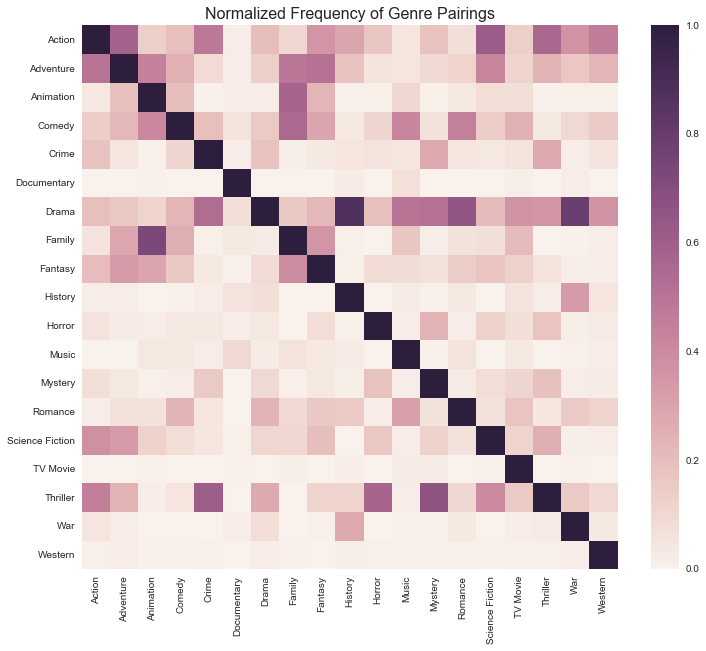

In [183]:
plt.figure(figsize=(12, 10))
plt.title("Normalized Frequency of Genre Pairings", fontsize=16)
sns.heatmap(percent_df)

### Insights

* The pairings with high percentages are very intuitive.
* Family genre is often paired with comedy (kid movies), crime and thriller and paired often, as are mystery and thriller, war and drama, drama and history, etc.

In [181]:
percent_df.to_csv("genre_pairings_percentage.csv")

In [50]:
## iterate through the pages and then the movies 
### this will give us back a list of lists of pairings 
genre_pairings = []
for page in romance_list:
    for movie in page: 
        genre_pairings.append(movie["genre_ids"])

In [30]:
### This will give 
horror_count = 0 
drama_count = 0 
## iterate through the genre pairings for each movie
## add a count if horror appears or drama appears

for pairing in genre_pairings:
    
    if HORROR_ID in pairing: 
        horror_count += 1 
    
    if DRAMA_ID in pairing:
        drama_count += 1

    

In [31]:
num_movies = len(genre_pairings)
print "We test on this many movies classified as Romance:", num_movies

drama_romance_perc = drama_count / float(num_movies)
horror_romance_perc= horror_count / float(num_movies)
print "Percentage of Romance Movies Paired with Drama:", drama_romance_perc
print "Percentage of Romance Movies Paired with Horror:", horror_romance_perc


We test on this many movies classified as Romance: 380
Percentage of Romance Movies Paired with Drama: 0.652631578947
Percentage of Romance Movies Paired with Horror: 0.0157894736842


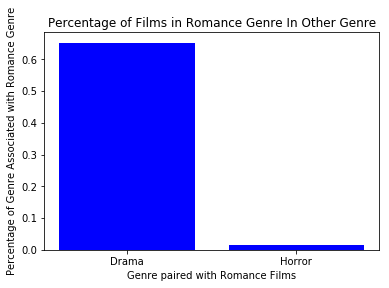

In [33]:
## initialize X and Y for plotting 
Y = np.array([drama_romance_perc, horror_romance_perc])
LABELS = np.array(["Drama", "Horror"])
X = [1,2]

plt.bar(X, Y,  color="blue")
plt.xticks(X, LABELS)
plt.title("Percentage of Films in Romance Genre In Other Genre")
plt.xlabel("Genre paired with Romance Films")
plt.ylabel("Percentage of Genre Associated with Romance Genre")

### Explanation of Romance and Other Dramas
The takeaway from the above bar graph is that more romance fils are paired with drama than they are by horror. (BY A LOT.) However, let's explain how we received our results. 

We decided to compare the percentage of romance films that were ALSO associated with other genres. To do this, we selected a random subset of our romance films. We used roughly 380 romance films randomly selected from all films with the genre "romance" tag. Of these 380 films, we then looked at the percentage of these films that also shared the genre tag "horror" or "drama" or both. We divided by the total number of films with the horror/drama tag by all romance films used. This gave us are above percentages. 

# A list of questions you could answer with this and related data. Get creative here!

* Which movies are the most fluid across genres?
* Which genres are most constrictive (i.e. does having genre X mean you're less likely to be paired with another genre?)
* What pairing of movies genres are most likely to go together?
* Do certain genre pairings result in higher amounts of revenue (e.g. "action romance" doing better than "action")?
* Are there statistically significant differences in movie length by genre? For example, are comedies consistently lower?
* Are there statistically significant differences in movie rating by movie length? Do people tend to like shorter movies more or longer movies more? How does this difference interact with genre?
* What is the highest revenue per minute by genre (we could answer this by dividing average revenue by average movie length)?
* Are adult films frequently labelled other genres? For example, are there such things as "adult fantasy" films and "adult comedy" films?
* How do these english genre distributions compare versus a similar analysis done on a different language’s database? Are french movies, for instance, more likely to have different genre pairings than english movies?
* How does genre density differ as a function of time? Are some genres more popular now vs. long ago? What about pairing of genres?
* Does having an unoriginal movie title (e.g. "300") help revenue or hurt?
* How has (normalized) revenue changed over time as a function of genre? What about popularity?